<img src="images/usm.jpg" width="480" height="240" align="left"/>

# MAT281 - Laboratorio N°03

## Objetivos del laboratorio

* Reforzar conceptos básicos de análisis no supervisado.

## Contenidos

* [Problema 01](#p1)


<a id='p1'></a>
## I.- Problema 01


<img src="https://freedesignfile.com/upload/2013/06/Car-logos-1.jpg" width="360" height="360" align="center"/>


El conjunto de datos se denomina `vehiculos_procesado_con_grupos.csv`, el cual contine algunas de las características más importante de un vehículo.

En este ejercicio se tiene como objetivo, es poder clasificar los distintos vehículos basados en las cracterísticas que se presentan a continuación. La dificultad de este ejercicio radíca en que ahora tenemos variables numéricas y variables categóricas.

Lo primero será cargar el conjunto de datos:

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.dummy import DummyClassifier
from sklearn.cluster import KMeans


%matplotlib inline
sns.set_palette("deep", desat=.6)
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [2]:
# cargar datos
df = pd.read_csv(os.path.join("data","vehiculos_procesado_con_grupos.csv"), sep=",")\
       .drop(
            ["fabricante", 
             "modelo",
             "transmision", 
             "traccion", 
             "clase", 
             "combustible",
             "consumo"], 
    
          axis=1)

df.head()

,year,desplazamiento,cilindros,co2,clase_tipo,traccion_tipo,transmision_tipo,combustible_tipo,tamano_motor_tipo,consumo_tipo,co2_tipo,consumo_litros_milla
0,1984,2.5,4.0,522.764706,Vehículos Especiales,dos,Automatica,Normal,pequeño,alto,alto,0.222671
1,1984,4.2,6.0,683.615385,Vehículos Especiales,dos,Automatica,Normal,grande,muy alto,muy alto,0.291185
2,1985,2.5,4.0,555.437500,Vehículos Especiales,dos,Automatica,Normal,pequeño,alto,alto,0.236588
3,1985,4.2,6.0,683.615385,Vehículos Especiales,dos,Automatica,Normal,grande,muy alto,muy alto,0.291185
4,1987,3.8,6.0,555.437500,Coches Medianos,dos,Automatica,Premium,grande,alto,alto,0.236588


En este caso, no solo se tienen datos numéricos, sino que también categóricos. Además, tenemos problemas de datos **vacíos (Nan)**. Así que para resolver este problema, seguiremos varios pasos:

## 1.- Normalizar datos

1. Cree un conjunto de datos con las variables numéricas, además, para cada dato vacía, rellene con el promedio asociado a esa columna. Finalmente, normalize los datos mediante el procesamiento **MinMaxScaler** de **sklearn**.

2.-  Cree un conjunto de datos con las variables categóricas , además, transforme de variables numéricas a categóricas ocupando el comando **get_dummies** de pandas ([refrenecia](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html)). Explique a grande rasgo como se realiza la codificación de variables numéricas a categóricas.

3.- Junte ambos dataset en uno, llamado **df_procesado**. 


In [3]:
cont_predictor_names = [] # continuous variables
cat_predictor_names = [] # categorical variables

for column in df.columns:
    if df[column].dtype == 'object':
        cat_predictor_names.append(column)
    else:
        cont_predictor_names.append(column)

print(cont_predictor_names)
print(cat_predictor_names)

['year', 'desplazamiento', 'cilindros', 'co2', 'consumo_litros_milla']
['clase_tipo', 'traccion_tipo', 'transmision_tipo', 'combustible_tipo', 'tamano_motor_tipo', 'consumo_tipo', 'co2_tipo']


In [4]:
# definimos el dataframe con variables numéricas

df_cont = df.drop(cat_predictor_names, axis=1)
df_cont.head()

,year,desplazamiento,cilindros,co2,consumo_litros_milla
0,1984,2.5,4.0,522.764706,0.222671
1,1984,4.2,6.0,683.615385,0.291185
2,1985,2.5,4.0,555.437500,0.236588
3,1985,4.2,6.0,683.615385,0.291185
4,1987,3.8,6.0,555.437500,0.236588


In [5]:
# reemplazamos los valores NaN por la media de la columna
for column in df_cont.columns:
    if df_cont[column].notnull().all() == False:
        df_cont = df_cont.fillna(df_cont[column].mean())

In [6]:
# normalizamos con MinMaxScaler

scaler = MinMaxScaler()
df_cont[cont_predictor_names] = scaler.fit_transform(df_cont[cont_predictor_names])

df_cont.head()

,year,desplazamiento,cilindros,co2,consumo_litros_milla
0,0.000000,0.243590,0.142857,0.398014,0.331027
1,0.000000,0.461538,0.285714,0.527672,0.475113
2,0.029412,0.243590,0.142857,0.424351,0.360294
3,0.029412,0.461538,0.285714,0.527672,0.475113
4,0.088235,0.410256,0.285714,0.424351,0.360294


In [7]:
# creamos el dataframe con variables categóricas

df_cat = df.drop(cont_predictor_names, axis=1)
df_cat.head()

,clase_tipo,traccion_tipo,transmision_tipo,combustible_tipo,tamano_motor_tipo,consumo_tipo,co2_tipo
0,Vehículos Especiales,dos,Automatica,Normal,pequeño,alto,alto
1,Vehículos Especiales,dos,Automatica,Normal,grande,muy alto,muy alto
2,Vehículos Especiales,dos,Automatica,Normal,pequeño,alto,alto
3,Vehículos Especiales,dos,Automatica,Normal,grande,muy alto,muy alto
4,Coches Medianos,dos,Automatica,Premium,grande,alto,alto


In [8]:
# utilizamos get_dummies para transformar los valores categóricos a valores numéricos

df_cat_dummies = pd.get_dummies(df_cat)
df_cat_dummies.head()

,clase_tipo_Camionetas,clase_tipo_Coche Familiar,clase_tipo_Coches Grandes,clase_tipo_Coches Medianos,clase_tipo_Coches pequeños,clase_tipo_Deportivos,clase_tipo_Furgoneta,clase_tipo_Vehículos Especiales,traccion_tipo_cuatro,traccion_tipo_dos,...,consumo_tipo_alto,consumo_tipo_bajo,consumo_tipo_moderado,consumo_tipo_muy alto,consumo_tipo_muy bajo,co2_tipo_alto,co2_tipo_bajo,co2_tipo_moderado,co2_tipo_muy alto,co2_tipo_muy bajo
0,0,0,0,0,0,0,0,1,0,1,...,1,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,1,0,1,...,0,0,0,1,0,0,0,0,1,0
2,0,0,0,0,0,0,0,1,0,1,...,1,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,1,0,1,...,0,0,0,1,0,0,0,0,1,0
4,0,0,0,1,0,0,0,0,0,1,...,1,0,0,0,0,1,0,0,0,0


**get_dummies** asocia los tipos de elementos categóricas de una columna con un **label** numérico. Así, por ejemplo, en la columna **co2_tipo** para el índice 0 se tiene 'alto' y para el índice 1 se tiene 'muy alto'. Luego, get_dummies crea una columna 'co2_tipo_alto' y otra columna 'co2_tipo_muy alto' y asocia el valor 1 si pertenece a esa categoría y 0 si no.

In [9]:
# definimos el dataframe procesado usando el comando join

df_procesado = df_cont.join(df_cat_dummies)
df_procesado.head()

,year,desplazamiento,cilindros,co2,consumo_litros_milla,clase_tipo_Camionetas,clase_tipo_Coche Familiar,clase_tipo_Coches Grandes,clase_tipo_Coches Medianos,clase_tipo_Coches pequeños,...,consumo_tipo_alto,consumo_tipo_bajo,consumo_tipo_moderado,consumo_tipo_muy alto,consumo_tipo_muy bajo,co2_tipo_alto,co2_tipo_bajo,co2_tipo_moderado,co2_tipo_muy alto,co2_tipo_muy bajo
0,0.000000,0.243590,0.142857,0.398014,0.331027,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
1,0.000000,0.461538,0.285714,0.527672,0.475113,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0.029412,0.243590,0.142857,0.424351,0.360294,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
3,0.029412,0.461538,0.285714,0.527672,0.475113,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,0.088235,0.410256,0.285714,0.424351,0.360294,0,0,0,1,0,...,1,0,0,0,0,1,0,0,0,0


In [10]:
df_procesado.describe()

,year,desplazamiento,cilindros,co2,consumo_litros_milla,clase_tipo_Camionetas,clase_tipo_Coche Familiar,clase_tipo_Coches Grandes,clase_tipo_Coches Medianos,clase_tipo_Coches pequeños,...,consumo_tipo_alto,consumo_tipo_bajo,consumo_tipo_moderado,consumo_tipo_muy alto,consumo_tipo_muy bajo,co2_tipo_alto,co2_tipo_bajo,co2_tipo_moderado,co2_tipo_muy alto,co2_tipo_muy bajo
count,36791.000000,36791.000000,36791.000000,36791.000000,36791.000000,36791.000000,36791.000000,36791.000000,36791.000000,36791.000000,...,36791.000000,36791.000000,36791.000000,36791.000000,36791.000000,36791.000000,36791.000000,36791.000000,36791.000000,36791.000000
mean,0.493748,0.348947,0.267593,0.358049,0.285734,0.147835,0.068848,0.049931,0.115816,0.353538,...,0.130141,0.203528,0.274007,0.184284,0.208040,0.129434,0.200593,0.275013,0.194395,0.200565
std,0.305137,0.174347,0.125577,0.095790,0.106183,0.354941,0.253200,0.217805,0.320009,0.478074,...,0.336463,0.402627,0.446019,0.387721,0.405911,0.335684,0.400449,0.446527,0.395740,0.400429
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.205882,0.205128,0.142857,0.288086,0.208866,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.529412,0.307692,0.285714,0.352257,0.281734,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.764706,0.474359,0.285714,0.424351,0.331027,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## 2.- Realizar ajuste mediante kmeans

Una vez depurado el conjunto de datos, es momento de aplicar el algoritmo de **kmeans**.

1. Ajuste el modelo de **kmeans** sobre el conjunto de datos, con un total de 8 clusters.
2. Calcular los cluster y el valor de los centroides.
3. Realizar que resumas las principales cualidades de cada cluster. Para  cada cluster calcule:

    a. Valor promedio de las variables numérica.\
    b. Moda para las variables numericas
    
    

In [17]:
# ajustar modelo: k-means

from sklearn.cluster import KMeans

kmeans = KMeans()
kmeans.fit(df_procesado)


centroids = kmeans.cluster_centers_ # centros 
clusters = kmeans.labels_ # clusters

In [18]:
# etiquetar los datos con los clusters encontrados

df_procesado["cluster"] = clusters
df_procesado["cluster"] = df_procesado["cluster"].astype('category')
centroids_df_proc = pd.DataFrame(centroids, columns=df_procesado.columns)
centroids_df_proc["cluster"] = [1,2,3,4,5,6,7,8]

In [29]:
df_procesado.head()

,year,desplazamiento,cilindros,co2,consumo_litros_milla,clase_tipo_Camionetas,clase_tipo_Coche Familiar,clase_tipo_Coches Grandes,clase_tipo_Coches Medianos,clase_tipo_Coches pequeños,...,consumo_tipo_bajo,consumo_tipo_moderado,consumo_tipo_muy alto,consumo_tipo_muy bajo,co2_tipo_alto,co2_tipo_bajo,co2_tipo_moderado,co2_tipo_muy alto,co2_tipo_muy bajo,cluster
0,0.000000,0.243590,0.142857,0.398014,0.331027,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,6
1,0.000000,0.461538,0.285714,0.527672,0.475113,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,5
2,0.029412,0.243590,0.142857,0.424351,0.360294,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,6
3,0.029412,0.461538,0.285714,0.527672,0.475113,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,5
4,0.088235,0.410256,0.285714,0.424351,0.360294,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,6


In [42]:
df_procesado['cluster'].unique() # clusters

[6, 5, 2, 0, 3, 4, 1, 7]
Categories (8, int64): [6, 5, 2, 0, 3, 4, 1, 7]

In [45]:
# calculamos la media y moda de los datos clusterizados mediante k-means cuyos atributos sean originalmente numéricos

for i in range(1,9):
    print("Media de cluster ",i)
    print(df_procesado[df_procesado['cluster']==i-1][cont_predictor_names].mean()) # media de cada cluster
    print("")
    print("Moda de cluster ",i)
    print(str(df_procesado[df_procesado['cluster']==i-1][cont_predictor_names].mode())) # moda de cada cluster
    print("")

Media de cluster  1
year                    0.569184
desplazamiento          0.168687
cilindros               0.145262
co2                     0.240954
consumo_litros_milla    0.156490
dtype: float64

Moda de cluster  1
       year  desplazamiento  cilindros       co2  consumo_litros_milla
0  0.970588        0.179487   0.142857  0.275108              0.194444

Media de cluster  2
year                    0.647148
desplazamiento          0.332203
cilindros               0.262018
co2                     0.352759
consumo_litros_milla    0.279481
dtype: float64

Moda de cluster  2
       year  desplazamiento  cilindros       co2  consumo_litros_milla
0  0.970588        0.307692   0.285714  0.374603              0.305011

Media de cluster  3
year                    0.524798
desplazamiento          0.250383
cilindros               0.195099
co2                     0.304326
consumo_litros_milla    0.226506
dtype: float64

Moda de cluster  3
       year  desplazamiento  cilindros       co2  cons

## 3.- Elegir Número de cluster

Estime mediante la **regla del codo**, el número de cluster apropiados para el caso.
Para efectos prácticos, eliga la siguiente secuencia como número de clusters a comparar:

$$[5, 10, 20, 30, 50, 75, 100, 200, 300]$$

Una ve realizado el gráfico, saque sus propias conclusiones del caso.


In [46]:
# implementación de la regla del codo

Nc = [5, 10, 20, 30, 50, 75, 100, 200, 300]
kmeans = [KMeans(n_clusters=i) for i in Nc]
score = [kmeans[i].fit(df_procesado).inertia_ for i in range(len(kmeans))]


df_Elbow = pd.DataFrame({'Number of Clusters':Nc,
                        'Score':score})

df_Elbow.head()

,Number of Clusters,Score
0,5,118566.228057
1,10,83040.392442
2,20,67439.699611
3,30,57235.645493
4,50,46198.345280


<AxesSubplot:title={'center':'Elbow Curve'}, xlabel='Number of Clusters', ylabel='Score'>

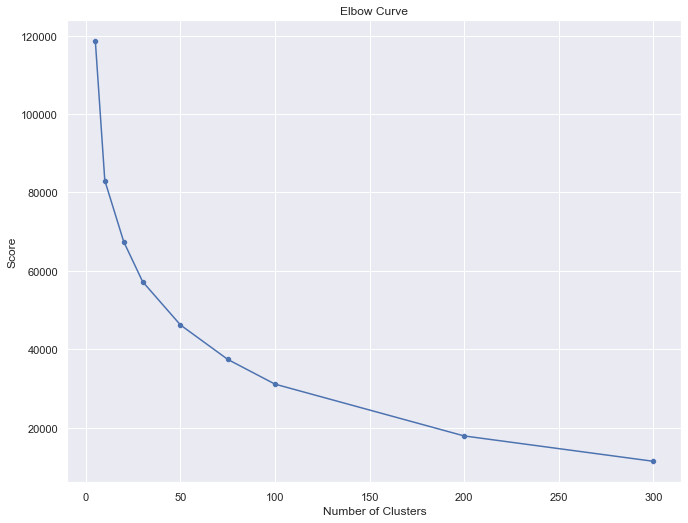

In [47]:
# graficar los datos etiquetados con k-means

fig, ax = plt.subplots(figsize=(11, 8.5))
plt.title('Elbow Curve')
sns.lineplot(x="Number of Clusters",
             y="Score",
            data=df_Elbow)
sns.scatterplot(x="Number of Clusters",
             y="Score",
             data=df_Elbow)

Tiene sentido que el número de clusters óptimo sea 10, pues el Score indica que los datos están menos dispersos que con 8 clusters. Si bien podríamos considerar incluso 20 cluster (o más), el costo de oportunidad es bastante alto como para escoger esa cantidad de clusters, pues podríamos caer en la maldición de la dimensionalidad del problema (son 36 atributos), además que el Score va bajando cada vez menos a medida que aumentan los clusters.